<a href="https://colab.research.google.com/github/tousifvk1826/fmml2021/blob/main/Labs%20and%20Projects%20ML/Module4_Lab3_fmml20210760.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad
# Module 4: Perceptron and Gradient Descent
## Lab 3: Gradient Descent
### Module Coordinator: Tanish Lad

Gradient descent is a very important algorithm to understand, as it underpins many of the more advanced algorithms used in Machine Learning and Deep Learning.

A brief overview of the algorithm is


*   start with a random initialization of the solution.
*   incrementally change the solution by moving in the direction of negative gradient of the objective function.
*   repeat the previous step until some convergence criteria is met.

The key equation for change in weight is:
$$w^{k+1} \leftarrow w^k - \eta \Delta J$$

In this lab, we will discuss stochastic gradient descent, mini-batch gradient descent and batch gradient descent.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(42)

# Creating the Data

Let's generate some data with:
\begin{equation} y_0= 4 \end{equation} 
\begin{equation} y_1= 3 \end{equation} 

and also add some noise to the data.

In [ ]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Let's also plot the data we just created

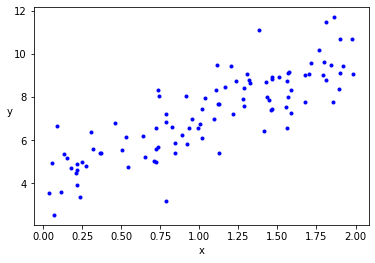

In [ ]:
plt.plot(X, y, 'b.')
plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.show()

## Cost Function

The equation for calculating cost function is as shown below. The cost function is only for linear regression. For other algorithms, the cost function will be different and the gradients would have to be derived from the cost functions

\begin{equation}
J(y_{pred}) = \frac{1}{2m}  \sum_{i=1}^{m} (h(y_{pred})^{(i)} - y^{(i)})^2 
\end{equation}

In [ ]:
def cal_cost(y_pred, X, y):
    '''
    Calculates the cost for given X and Y.
    y_pred = Vector of y_preds 
    X = Row of X's np.zeros((2, j))
    y = Actual y's np.zeros((2, 1))
    
    where:
        j is the no of features
    '''
    
    m = len(y)
    
    predictions = X.dot(y_pred)
    cost = (1 / 2 * m) * np.sum(np.square(predictions - y))

    return cost

## Gradients

\begin{equation}
y_{pred_0}: = y_{pred_0} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
\begin{equation}
y_{pred_1}: = y_{pred_1} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
.

.

.

.

\begin{equation}
y_{pred_j}: = y_{pred_j} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}

In [ ]:
def gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    y_pred_history = np.zeros((iterations, 2))
    
    for it in range(iterations):    
        prediction = np.dot(X, y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        
        y_pred_history[it,:] = y_pred.T
        cost_history[it]  = cal_cost(y_pred, X, y)
        
    return y_pred, cost_history, y_pred_history    

Let's do 1000 iterations with a learning rate of 0.01. 
We will start with a random prediction.

In [ ]:
lr = 0.001
n_iter = 1000

y_pred = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history, y_pred_history = gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))


y_pred[0]: 3.956
y_pred[1]: 2.461
Final error: 7964.199


In [ ]:
print(X.shape, X.ndim)
print(y.shape, y.ndim)
print(y_pred.shape, y_pred.ndim)

(100, 1) 2
(100, 1) 2
(2, 1) 2


Plotting the error vs Number of iterations

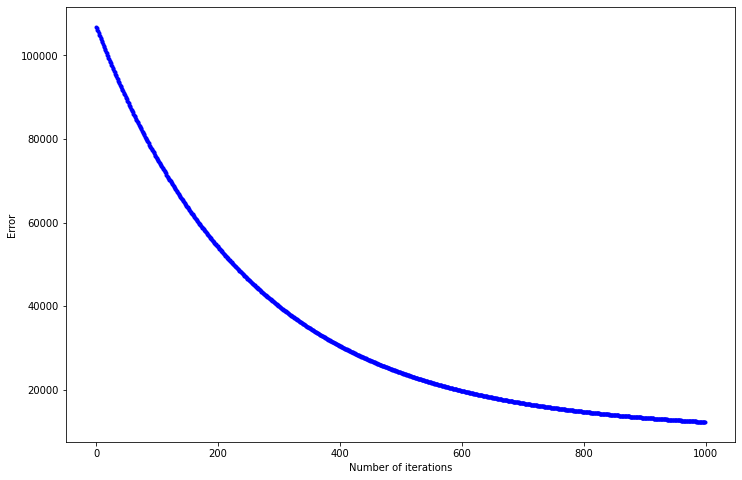

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')

ax.plot(range(n_iter), cost_history, 'b.')

Zooming in...

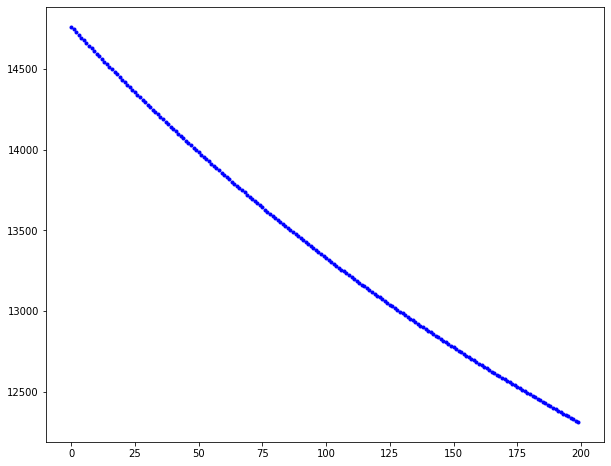

In [ ]:
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(range(200), cost_history[800:1000], 'b.')

# Stochastic Gradient Descent

In Batch Gradient Descent we were considering all the examples for every step of Gradient Descent. But what if our dataset is very huge. Deep learning models crave for data. The more the data the more chances of a model to be good. Suppose our dataset has 5 million examples, then just to take one step the model will have to calculate the gradients of all the 5 million examples. This does not seem an efficient way. To tackle this problem we have Stochastic Gradient Descent. In Stochastic Gradient Descent (SGD), we consider just one example at a time to take a single step.

In [ ]:
def stocashtic_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_pred np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    
    for it in range(iterations):
        cost = 0.0
        
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate *(X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost
        
    return y_pred, cost_history

In [ ]:
lr = 0.001
n_iter = 50
y_pred = np.random.randn(2, 1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history = stocashtic_gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 0.958
y_pred[1]: -0.487
Final error: 2265.684


In [ ]:
X_b.shape

(100, 2)

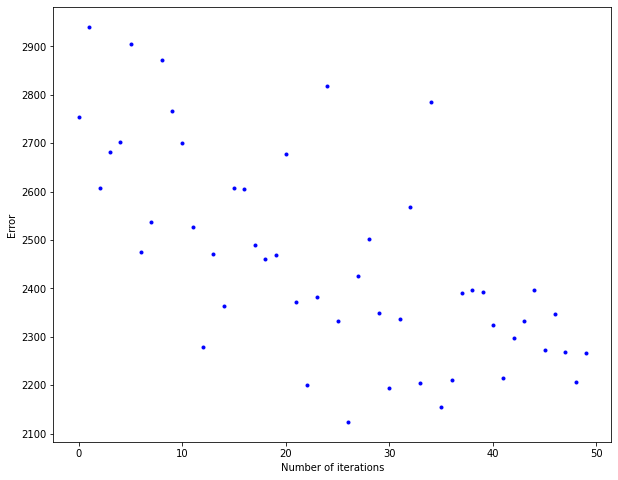

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

# Mini Batch Gradient Descent

We have seen the Batch Gradient Descent. We have also seen the Stochastic Gradient Descent. Batch Gradient Descent can be used for smoother curves. SGD can be used when the dataset is large. Batch Gradient Descent converges directly to minima. SGD converges faster for larger datasets. But, since in SGD we use only one example at a time, we cannot implement the vectorized implementation on it. This can slow down the computations. To tackle this problem, a mixture of Batch Gradient Descent and SGD is used.
Neither we use all the dataset all at once nor we use the single example at a time. We use a batch of a fixed number of training examples which is less than the actual dataset and call it a mini-batch. Doing this helps us achieve the advantages of both the former variants we saw.

In [ ]:
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=8):
    '''
    X = Matrix of X without added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)
    
    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]
            
            X_i = np.c_[np.ones(len(X_i)), X_i]
            #print(X_i.shape)
            prediction = np.dot(X_i, y_pred)
            #print(y_pred.shape)
            #print(prediction.shape)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost
        
    return y_pred, cost_history

In [ ]:
lr = 0.001
n_iter = 200
y_pred = np.random.randn(2,1)
y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 0.546
y_pred[1]: 1.229
Final error: 12123.808


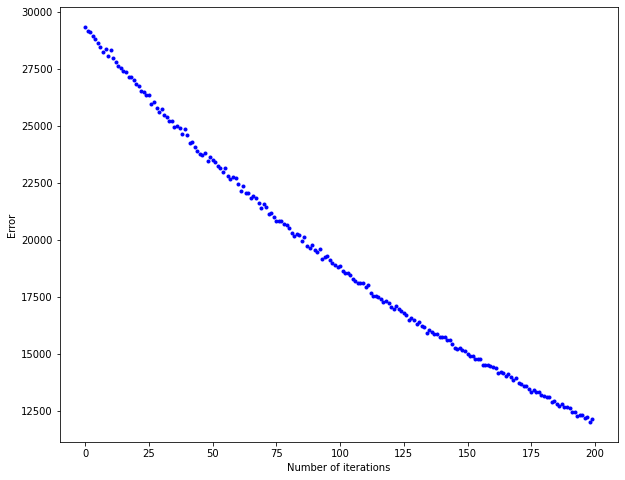

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
#y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

Things to try out:

1. Change batch size in mini-batch gradient descent.
2. Test all the three out on real datasets.
3. Compare the effects of changing learning rate by the same amount in Batch GD, SGD and Mini-batch GD.

1Ans:
when the batch size was 20:
Final error was: 806.677

y[0]= 4.159 

y[1]= 2.819

increasing the batch size to 30:

Final error was:1093.786

y[0]= 4.179

y[1]=2.801

increasing the batch size to 35:

Final error was:1347.153

y[0]= 4.150

y[1]=2.828
#### **Decreasing the Batch size:**
now lets decrease the batch size to 15:

Final error was:591.491

y[0]= 4.23

y[1]=2.755

lets futher decrease the batch size to 10:

Final error was:402.544

y[0]= 4.183

y[1]=2.798


I had noticed that as we increase the batch size the error is increasing in this example. while decreasing the batch size the error is decreasing.

3Ans:
if we decrease the learnig rate then the error is increaising in all the three cases.for learning rate =0.001

2Ans:

In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
iris = datasets.load_iris()

In [ ]:
df = pd.DataFrame(data= iris.data , columns = iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [ ]:
x=df.iloc[:100,:-1]
print(x.shape)



(100, 4)


In [ ]:
y=df.iloc[:100,4]
print(y.shape)

(100,)


In [ ]:
w = np.random.randn(4,1)
print(w.shape)



(4, 1)


In [ ]:
def gradient_descent_1(X, y, y_pred, learning_rate=0.01, iterations=10000):
    m = len(y)
    cost_history = np.zeros(iterations)
    y_pred_history = np.zeros((iterations, 4))
    
    for it in range(iterations):    
        prediction = np.dot(X, y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        #print(y_pred.shape)
        y_pred_history[it,:] = y_pred.T
        cost_history[it]  = cal_cost(y_pred, X, y)
        
    return y_pred, cost_history, y_pred_history

In [ ]:
n=10000
lr=0.03
x1=np.array(x)
y1=np.array(y)
new_y,cost_h,old_w = gradient_descent_1(x1,y1,w,lr,n)
print('Final error: {:0.3f}'.format(cost_h[-1]))

Final error: 17716.727


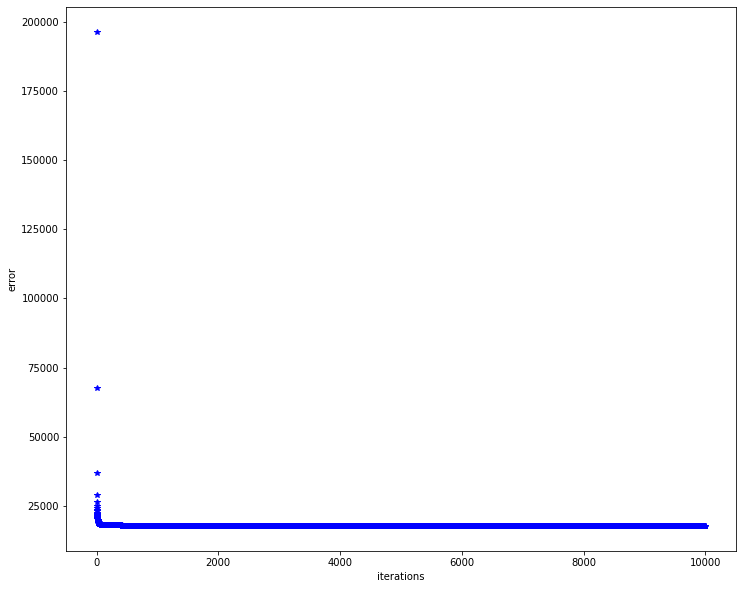

In [ ]:
fig,ax = plt.subplots(figsize=(12,10))
ax.set_ylabel("error")
ax.set_xlabel("iterations")
ax.plot(range(n),cost_h,'b*' )

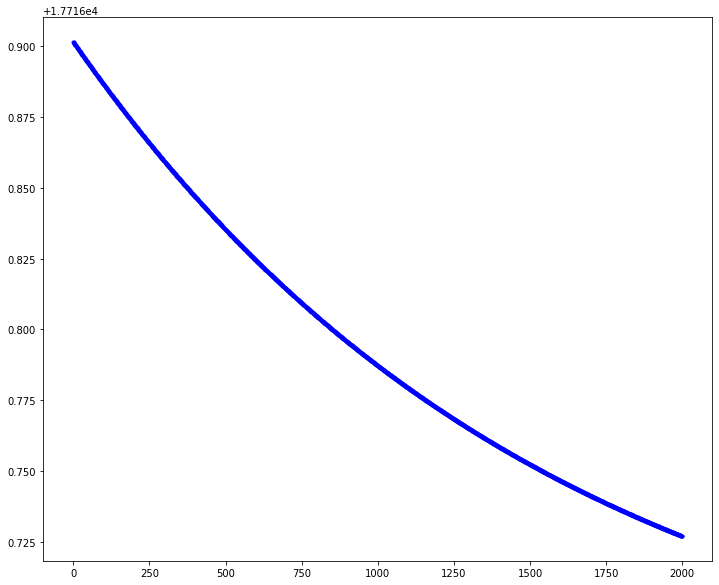

In [ ]:
fig,ax = plt.subplots(figsize=(12,10))
ax.plot(range(2000), cost_h[8000:10000], 'b.')

In [ ]:
def stocashtic_gradient_descent_1(X, y, y_pred, learning_rate=0.01, iterations=10):
    m = len(y)
    cost_history = np.zeros(iterations)
    
    for it in range(iterations):
        cost = 0.0
        
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate *(X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost
        
    return y_pred, cost_history

In [ ]:
n=10000

ny,c_h=stocashtic_gradient_descent_1(x1,y1,w,lr,n)
print('Final error: {:0.3f}'.format(c_h[-1]))

Final error: 158.427


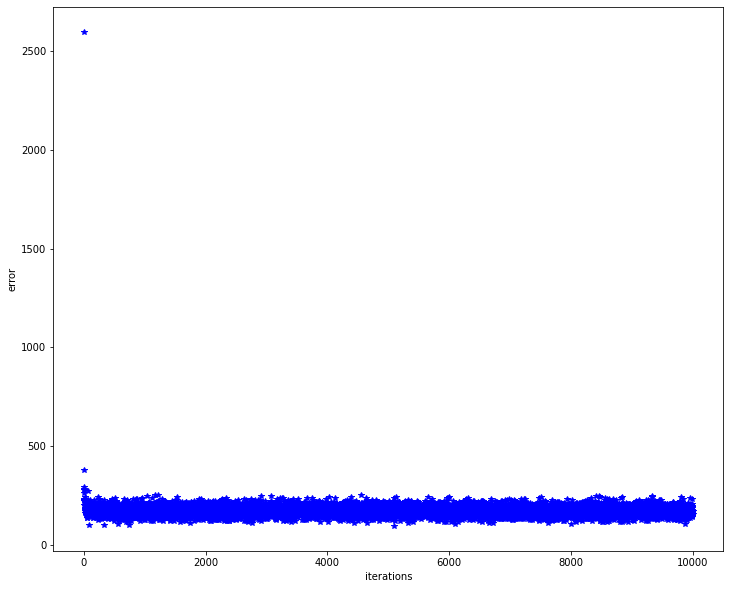

In [ ]:
fig,ax = plt.subplots(figsize=(12,10))
ax.set_ylabel("error")
ax.set_xlabel("iterations")
ax.plot(range(n),c_h,'b*' )

In [ ]:
def minibatch_gradient_descent_1(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=2):
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)
    
    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]
            
            #X_i = np.ones(len(X_i))
            #print(X_i.shape)
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost
        
    return y_pred, cost_history

In [ ]:
w_pred,cos_h=minibatch_gradient_descent_1(x1,y1,w,lr,n)

In [ ]:
print('Final error: {:0.3f}'.format(cos_h[-1]))

Final error: 359.528


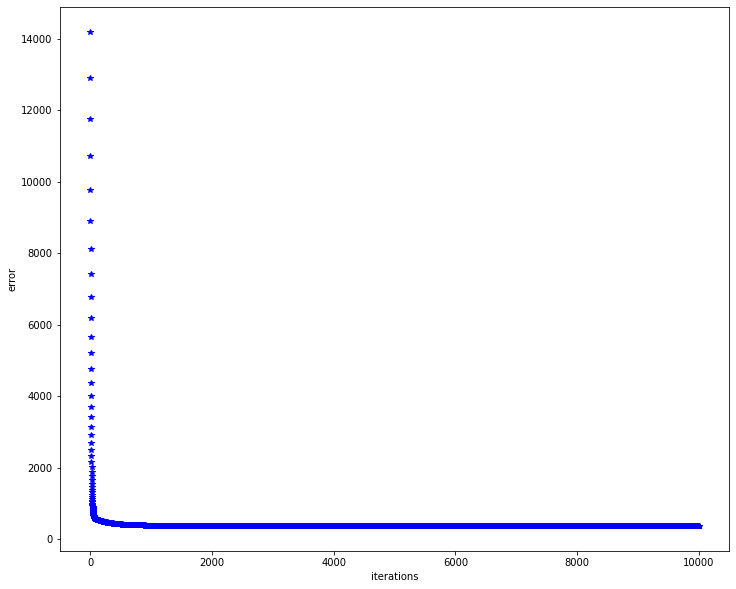

In [ ]:
fig,ax = plt.subplots(figsize=(12,10))
ax.set_ylabel("error")
ax.set_xlabel("iterations")
ax.plot(range(n),cos_h,'b*' )